In [1]:
## settings
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt5
import scipy, scipy.stats
plt.rcParams['figure.figsize'] = (8.0, 4.0)
from ipywidgets import interact, fixed
%matplotlib inline

$\usepackage{amssymb} \newcommand{\R}{\mathbb{R}} \newcommand{\vx}{\vec{x}} \newcommand{\vy}{\vec{y}} \newcommand{\vw}{\vec{w}} \newcommand{\Wc}{{\bf W}_c}$

## 5.4. Further Projection Methods: Projection Pursuit

### 5.4.1. Projection Pursuit

* A simple way to find a low-dimensional projection is PCA.
* The key disadvantage is that PCA is only variance based: no other structural property is respected.

Generalization of the principle 'to maximize a criterion for well-structuredness' yields other (maybe) more meaningful projections.
* central element is the measure for structuring ('Strukturbewertungsmaß')
* Many structures manifest in the occurrence of local clustering
<img src = "images/cluster.png" width="60%">
* the seemingly 'more structured' plot is characterized by
 * more short data point pair distances
 * while having the same global variance as the other plot.
* a method that is only sensitive to variance can't assess any difference between these plots.

* The preference of projections that exhibit local clustering can be expressed via a specially-crafted structure-quality measure.
* Here we first implement the idea for a projection on a 1D-axis $\hat{k}$

$$
E(\hat{k})= \underbrace{s(\hat{k})}_{\text{global dispersion along } \hat{k}} 
\cdot \underbrace{d(\hat{k})}_{\text{mean vicinity along }\hat{k}}
$$
* by Friedman & Tukey 1974, IEEE Trans. Comp. C-23, 881ff.

<img src="images/PP-1d.png" width="60%">
* Illustration of the different structure quality of 1D-projections of a 2D dataset

Here it is
$$
s(\hat{k})=\sqrt \frac{\sum\limits_{i=p \cdot N}^{(1-p)N} (\vec{r}_i \cdot \hat{k}
  -\langle\vec{r}\rangle \cdot \hat{k})^2}{(1-2p)N}
$$
where 

\begin{eqnarray}
\vec{r}_i 		& = & \text{$i$-th data point $\in \R^d$ }\\
			&   & \text{ sorted ascending in } ~ \vec{r}_i \hat{k}\\
N 			& = & \text{nr. of data points} \\
p 			& \ll & 1 \text{ for removed outliers }\\
\langle r\rangle & = & \sum\limits_{i=p \cdot N}^{(1-p)N}\frac{\vec{r}_i }{(1-2p)N}\\
d(\hat{k}) 		& = & \sum\limits_{i,j=1 \atop i<j}^N f(r_{ij}) \cdot \Theta (R-r_{ij}) \\
r_{ij} 			& = & |\vec{r}_i \cdot \hat{k} - \vec{r}_j \cdot \hat{k}|\\
\end{eqnarray}

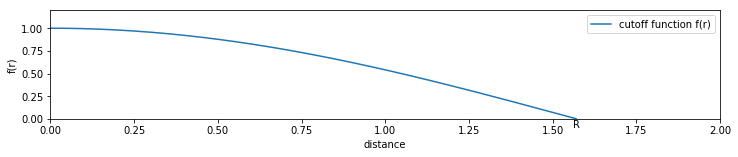

In [10]:
# plot f(r)
plt.figure(figsize=(12,2))
x = np.arange(0, np.pi/2, 0.01)
plt.plot(x, np.cos(x), label="cutoff function f(r)"); 
plt.axis([0,2,0,1.2]); plt.legend(); 
plt.xlabel("distance"); plt.ylabel("f(r)"); plt.text(1.56,-0.1, "R");

* shape of cutoff function $f(r)$ in the above equation
* The cutoff value $R$ defines the length up to which local clusterings shall be registered.
* $R$ is fix so that in the double sum above only $O(N \log N)$ terms contribute
 * this is done to reduce the computational effort.
* The maximization of $E(\hat{k})$ is done on the sphere surface $S^{D-1}$
 * generally there are many local maxima (very narrow, difficult to find)
 * good starting directions are given by PCA axes
 * because of the cut-off function $E(\hat{k})$ is relatively smooth.

**Generalization to 2D-projections**:
* either achieved by two-times applying the 1D method
 * i.e. the second axis is constraint to the orthogonal space of the first axis.
* or direct minimization of an analogue defined structure quality measure for two directions $\hat{k},\hat{l}$, e.g. 

$$
s(\hat{k},\hat{l}) = \sqrt{\sum (\vec{r}_i \hat{k} - \langle\vec{r}\rangle \hat{k})^2 +
  (\vec{r}_i \hat{l} - \langle\vec{r}\rangle \hat{l})^2}
$$
and
$$
d(\hat{k},\hat{l}) = \mbox{ wie zuvor, jedoch } r_{ij} = \sqrt{(r_i \hat{k}-
  r_j \hat{k})^2 + (r_i \hat{l} - r_j \hat{l})^2}
$$

### 5.4.2 Further propositions for projection indices 

**Point of departure**: statistical considerations: under all probability distributions of fixed variance $\sigma^2$, the normal distribution $N(x,\sigma)$ is the least informative
* is describes for $n\to\infty$ the resulting distribution of the superposition of $n$ uncorrelated random vectors.
* for that reason, a random projection converges always towards the normal distribution 
as limes $d \to \infty$
* for the normal distribution we receive the highest value for the Shannon entropy
	$$ S(P) = -\int P(x)\log P(x) dx$$

**Conclusion**:
* The interestingness of a projected probabiltiy distribution $P(x)$ can thus be measured and judged by its deviation from a normal distribution.
* w.l.o.g. the data can always be normalized so that $P(\cdot)$ has mean 0 and variance 1
* The deviation of $P$ from a normal distribution can be measured in different ways: (using $x=\hat{k}\cdot\vec{r}$ in the following):
\begin{eqnarray}
I_1 &:=& \int \frac{(P(x)-\cal{N}(x,1))^2}{2\cal{N}(x,1)} dx \quad \text{(Friedman (1987))} \\
I_2 &:=& \int (P(x)-{\cal N}(x,1))^2 dx \quad \text{(Hall)} \\
I_3 &:=& \int (P(x)-{\cal N}(x,1))^2 {\cal N}(x,1) dx \quad \text{(Hermite Index)}\\
\end{eqnarray}

**Interpretation**:
* $I_1$ favors deviations in the tails of the distribution
* $I_2$ offers a more balanced weighting of density differences at different $x$
* $I_3$ regards deviations within the center as particularly relevant

**Practical Procedure**:
* Religio of integrals on expectation values by expansion of $P(x)$ in orthogonal polynoms
$$
P(x) = \sum\limits_{\nu=0}^{\infty} a_\nu H_\nu (x) ~ ~ \text{(1)}
$$

** Example: Expansion of $I_3$ (Hermite Index)**:

* In this case we choose $H_\nu(x)$ as proportional to the so-called hermite polynomials.
* At suitable scaling we can assert the following orthogonality relations:
$$ \int\limits_{-\infty}^\infty H_\mu (x) H_\nu (x) N(x,1) dx = \delta_{\mu\nu} $$
* Integration of (1) after multiplying with $N(x,1)$ results in
$$ a_\mu = \int P(x) H_\mu (x) N(x,1) dx $$
and thus
$$ a_\mu = \langle H_\mu (x) N(x,1)\rangle_{\text{all data}} $$

Insertion into $I_3$, together with the expansion of $N$ according to 
$$ N(x,1) = \sum\limits_{\mu=0}^\infty b_\mu H_\mu (x)$$ 
in Hermite polynomials, under exploitation of the orthogonality relations 
$$\langle H_\mu H_\nu\rangle = \delta_{ij}$$ gives:

\begin{eqnarray}
 I_3 &=& \int (P(x)-N(x))^2 N(x) dx \\
        &=& \int\left(\left(\sum_\nu a_\nu H_\nu\right)-\left(\sum_\mu b_\mu H_\mu\right)\right)^2 N(x) dx\\
        &=& \int \left[ \sum\limits_{\mu\nu} a_\mu a_\nu H_\mu (x) H_\nu (x) \right.
	-  2\sum\limits_{\mu\nu} a_\mu b_\nu H_\mu (x) H_\nu (x)\\
	 &&+ \left.\sum\limits_{\mu\nu} b_\mu b_\nu H_\mu (x) H_\nu (x)  \right] N(x,1) dx \\
		 &=& \sum\limits_\mu \left[ a_\mu^2 -2a_\mu b_\mu + b_\mu^2 \right] 
	= \sum\limits_\mu [a_\mu - b_\mu]^2
\end{eqnarray}

* Practically, this series is stopped after few terms, e.g. directly after the leading term
$$ I_3^0 = (a_o - b_0)^2 = (a_0 - \frac{1}{2}\sqrt{\pi})^2 $$
and 
$$ a_0 = \langle H_0(x) N(x,1) \rangle_P = \langle N(x,1)\rangle_P $$

* Thus the evalution is reduced to the computation of expectation values $\langle\cdot\rangle_P$ w.r.t. the probability density of the data under projection.